What do **bias** and **variance** mean?

$$\mathbb{E}_{\mathcal{D}}[f(x;\mathcal{D})-\mathbb{y|x}^2] = \mathbb{E}_{\mathcal{D}}[ f(x;\mathcal{D}) - \mathbb{E}_{\mathcal{D}}(f(x;\mathcal{D}))^2 ] + (  \mathbb{E}_{\mathcal{D}}[f(x;\mathcal{D})] - \mathbb{E}[y|x]  )^2$$

, where
- $\mathbb{E}(y|x)$ is the Ideal Predictor;
- $f(x;\mathcal{D})$ is the classifier trained with data set $\mathcal{D}$.


- there are $M$ more data sets: $\mathcal{D_1}, \mathcal{D_2},\cdots, \mathcal{D_M}$
- Train M trees with high depth: $f(x, \mathcal{D_1}), \cdots, f(x, \mathcal{D_M})$
- Then, each tree will have high variacne (overfitted).
- Take an average (ensemble) instead: $\hat{f}(x) = \frac{1}{M} \sum^M_{i=1} f(x; \mathcal{D_i})$
- By the law of large numbers: $\hat{f}(x) \to \mathbb{E}_{\mathcal{D}}[ f(x, \mathcal{D_1}) ]$, i.e. $Variance \to 0$, with $M\to \infty$.

For me,
- Bias: the estimated squared error of the validation set.
- Variance: the squared error of the test set.

If in overfitting, the bias is low, but variance is large. In other words, model performs good for the validation set, and explain most of the disturbance of the validation set. However, cannot get a good estimate for the Test Set.

# Bagging and Boost

## Bagging (Bootstrap + Aggregating)

- partition the validation set, $\mathcal{D_1}, \mathcal{D_2},\cdots, \mathcal{D_M}$ 
    
    (Ideally, there should not be overlap for the validation set, or in other words, selection without replacement), because select with replacement would increase the correlation between validation set.
- train the model M trees with high depth: $f(x, \mathcal{D_1}), \cdots, f(x, \mathcal{D_M})$
- Then, each tree will have high variacne (overfitted).

### Random Forests
- Sample M data sets from the original dataset, $\mathcal{D_1}, \mathcal{D_2},\cdots, \mathcal{D_M}$
- train the model M trees with high depth: $f(x, \mathcal{D_1}), \cdots, f(x, \mathcal{D_M})$
- Randomly sub-sample (without replacement) k features before each split
- Sub-sampling decorrelates the trees and tends to improve generalisation
- A good rule of thumb is k =$\sqrt{d}$ (where d are the original number of features)
- Final estimator is averaged $\hat{f}(x) = \frac{1}{M}\sum^M_{i=1} f(x; \mathcal{D}_i )$

### Boosting
Boosting can be helpful if the model has a bias problem. Fit the Bias reptitvely, and aim to reduce the bias term.

Bagging, ensemble learning and others build models of the form: (also like the following)

$$f(x;\theta) = \sum_{m=1}^M \beta_m F_{m}(x;\theta)$$

, where $F_m$ is the $m^{th}$ tree, $\theta$ are the parameters, and $\beta_m$ is the weight, typically $1/M$.

The result is an additive model, the trees act like basis functions (and could be anything, even a NN!)

The goal is to minimise: 

$$ \min_{f} \sum^N_{i=1} L(y_i, f(x_i)) $$

For the **Boosting** model: Trees are grown sequentially using information obtained via previous trees. Each tree is typically (low depth). Each tree ﬁts a modiﬁed version of the original data set.

Boosting Framework:

Instead of solving: 

$$\min_{f} \sum_{i=1}^N L(y_i, f(x_i))$$

We perform the following approximation:

$$ (\beta_m, \theta_m) = arg\min_{\beta,\theta} \sum_{i=1}^N L(y_i, f_{m-1}(x_i) + \beta F(x_i,\theta)) $$

where $F(x_i,\theta)$ is a weak learner, and $\beta$ is the step-size.

We then set, $f_m(x) = f_{m-1}(x) + \beta_m F(x;\theta)$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

from sklearn.tree import DecisionTreeRegressor

In [14]:
N = 100
X = np.linspace(-1,1,N)
z = np.random.randn(N)
y = 3*np.square(X) + 0.05*z

# reshape the dataset
# the decision tree regressor require that reshaping
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [57]:
# the first time trainning, with dataset X & y
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

# the second time trainning, with dataset X & y2
# , where y2 is the residual
# , or the diff between y & first-time estimate
# in other word, we estimate the residual with X
y2 = y - tree_reg1.predict(X).reshape(-1,1)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X,y2)

# the second time trainning, with dataset X & y3
# , where y3 is the residual of reisual between y2 & the second-time estimate
y3 = y2 - tree_reg2.predict(X).reshape(-1,1)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

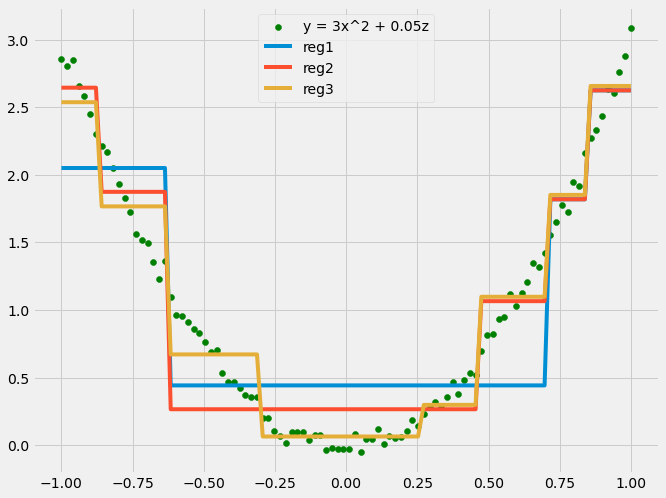

In [67]:
# the first time train
y_hat1 = tree_reg1.predict(X)
# the first time train + residual
y_hat2 = tree_reg1.predict(X) + tree_reg2.predict(X)
# the second time train + residual + residual of residual
y_hat3 = tree_reg1.predict(X) + tree_reg2.predict(X)+ tree_reg3.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X, y, label = 'y = 3x^2 + 0.05z', color = 'green')
plt.plot(X, y_hat1, label = 'reg1')
plt.plot(X, y_hat2, label = 'reg2')
plt.plot(X, y_hat3, label = 'reg3')
plt.legend()
plt.show()

## AdaBoost (Additive Boosting)

Adjust weights.

# Tree Ensembles

A big advantage of decision trees is that they are interpretable.

However after boosting, bagging etc they are not as easy to interpret.

A key measure to understand what the tree learned is feature importance:

$$ R_k(T) = \sum_{j=1}^{J-1} G_j \mathbb{1}(v_j = k) $$

Feature Importance of feature $k$ for the Tree $T$.

$G_j =$ reduction in cost at node $j$

$v_j = k$ if node $j$ uses feature $k$

$M$ trees,

$$ R_k(T_1, T_2, ..., T_M) = \frac{1}{M} \sum^M_{m=1} R_k(T_m) $$